# Проект: Принятие решений в бизнесе

## часть

Анализ крупного интернет-магазина. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест далее проанализируем результаты. <br><br>
**Задачи:**<br>
Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.<br><br>
Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.<br>
Укажим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.<br><br>

**Данные для первой части:**<br>
Датасет содержит содержит: <br>
-Hypothesis — краткое описание гипотезы;<br>
-Reach — охват пользователей по 10-балльной шкале;<br>
-Impact — влияние на пользователей по 10-балльной шкале;<br>
-Confidence — уверенность в гипотезе по 10-балльной шкале;<br>
-Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
#Импортируем все библиотеки, которые нужны для первой части
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [3]:
data_hyp ['ICE'] = data_hyp ['Impact'] * data_hyp ['Confidence'] / data_hyp ['Efforts']

print(data_hyp [['Hypothesis', 'ICE']].sort_values('ICE', ascending=False))

                                          Hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


<i>Наиболее перспективные гипотезы по ICE: 8, 0, 7. <i>

**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [4]:
data_hyp ['RICE'] = data_hyp ['Reach'] * data_hyp ['Impact'] * data_hyp ['Confidence'] / data_hyp ['Efforts']

print(data_hyp [['Hypothesis','RICE']].sort_values('RICE', ascending=False))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


<i>Теперь наиболее перспективные гипотезы по ICE: 7, 2, 0. Однако на первом месте с  большим отрывом уже гипотеза 7, так получилось, потому что ее параметр Reach 10, в то время как у других гипотехз оно меньше.<i>

**Выберем 7 гипотезу :**<br>
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

## часть

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задачи, которые нужно выполнить, а затем сделать выводы и предположения.** <br><br>
**Проанализируем A/B-тест и построим:**<br>
1) График кумулятивной выручки по группам. <br>
2) График кумулятивного среднего чека по группам. <br>
3) График относительного изменения кумулятивного среднего чека группы B к группе A. <br>
4) График кумулятивного среднего количества заказов на посетителя по группам. <br>
5) График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. <br>
<br>
**После построения точечных графиков и подсчета персентилей сделаем выводы и предположения опираясь на:**<br>
1) Точечный график количества заказов по пользователям.<br> 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.<br>
2) Построим точечный график стоимостей заказов. 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.<br><br>

**Далее найдем статистические различия по сырым и очищенным данным:**
1) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.<br>
2) Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. <br>
3) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.<br>
4) Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. <br> <br>

**После всего этого примим решение по результатам теста и объясним его. <br>
Варианты решений:**<br>
1. Остановить тест, зафиксировать победу одной из групп.<br>
2. Остановить тест, зафиксировать отсутствие различий между группами.<br>
3. Продолжить тест.<br>

In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


<i>Таблицы без пропусков в данных.<i>

In [10]:
#Проверим данные на дубликаты:
orders.duplicated().sum()

0

<i>Явных дубликатов нет.<i>

In [11]:
visitor_A = orders[orders['group'] == 'A']['visitorId']
visitor_B = orders[orders['group'] == 'B']['visitorId']
dubl = orders.query('visitorId in @visitor_A and visitorId in @visitor_B')
dubl.sort_values('visitorId')


,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


In [12]:
print('Процент пользователей, которые оказались в обоих группах одновременно: ', round(len(dubl) / len(orders) * 100))

Процент пользователей, которые оказались в обоих группах одновременно:  15


<i>Есть неявные дубликаты, процент таких дубликатов не маленький (около 15%), но мы конкретно не знаем, в какой конректной группе нужно оставить пользователя, поэтому удалим эти данные.<i>

In [13]:
orders = orders.query('visitorId not in @dubl["visitorId"]')


**Соберем все нужные кумулятивные данные:**

**Названия столбцов данных (куммулятивные метрики):<br>**
date — дата;<br>
ordersPerDateA — количество заказов в выбранную дату в группе A;<br>
revenuePerDateA — суммарная выручка в выбранную дату в группе A;<br>
ordersPerDateB — количество заказов в выбранную дату в группе B;<br>
revenuePerDateB — суммарная выручка в выбранную дату в группе B;<br>
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;<br>
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;<br>
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;<br>
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;<br>
visitorsPerDateA — количество пользователей в выбранную дату в группе A;<br>
visitorsPerDateB — количество пользователей в выбранную дату в группе B;<br>
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;<br>
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.<br>

In [14]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**1) Построим график кумулятивной выручки по группам.**

Text(0.5, 1.0, 'Кумулятивная выручки по группам')

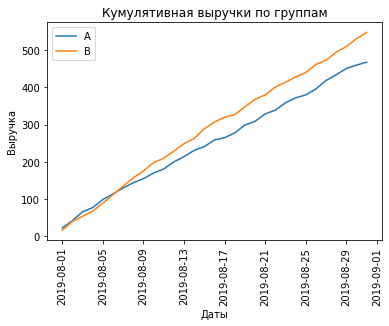

In [15]:
plt.plot(data['date'], data['ordersCummulativeA'], label='A')


plt.plot(data['date'], data['ordersCummulativeB'], label='B')

plt.legend() 
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.title("Кумулятивная выручки по группам")

<i>В самом начале теста сегмент В вырвался вперед и продолжал с небольшим отрывом лидировать весь остаток теста.<i>

**2) Построим график кумулятивного среднего чека по группам:**

Text(0.5, 1.0, 'Кумулятивный средний чек по группам')

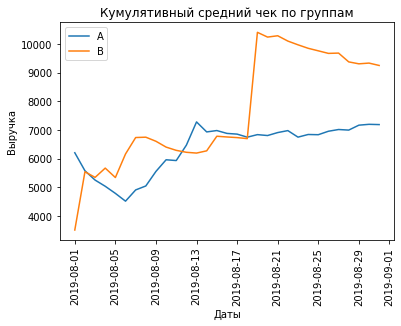

In [16]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')
plt.legend()
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.xticks(rotation=90)
plt.title("Кумулятивный средний чек по группам")

<i>Кумулятивное значение среднего чека по сегментам продолжает колебаться, но группа В явно выделяется.  <i>

**3) График относительного изменения кумулятивного среднего чека группы B к группе A:**

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы B к группе A')

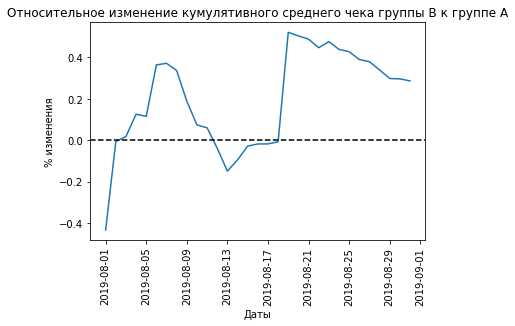

In [17]:
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Даты")
plt.ylabel("% изменения")
plt.xticks(rotation=90)
plt.title("Относительное изменение кумулятивного среднего чека группы B к группе A")

<i>Результаты теста резко менялись в несколько дат. Скорее всего в эти даты были совершены аномальные заказы<i>

**4) График кумулятивного среднего количества заказов на посетителя по группам:**


In [18]:
# считаем среднее количество заказов на посетителя по группам
data['conversionCummulativeA'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversionCummulativeB'] = data['ordersCummulativeB']/data['visitorsCummulativeB']
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB,conversionCummulativeA,conversionCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713,0.031989,0.023843
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294,0.031390,0.030912
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803,0.035772,0.029950
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573,0.030055,0.026428
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280,0.029837,0.027134


In [19]:
data['date'].max() #определим начальную дату для масштаба осей

Timestamp('2019-08-31 00:00:00')

In [20]:
data['date'].min() #аналогично минимальную дату

Timestamp('2019-08-01 00:00:00')

Text(0.5, 1.0, 'Кумулятивное среднее количество заказов на посетителя по группам')

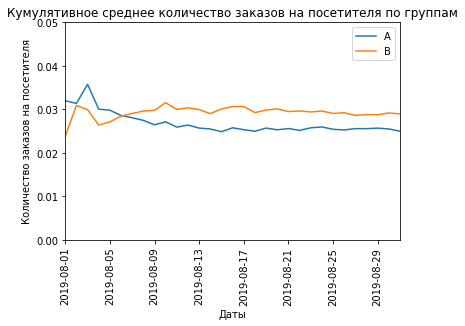

In [21]:
plt.plot(data['date'], data['conversionCummulativeA'], label='A')
plt.plot(data['date'], data['conversionCummulativeB'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31) ,0, 0.05])
plt.xlabel("Даты")
plt.ylabel("Количество заказов на посетителя")
plt.xticks(rotation=90)
plt.title("Кумулятивное среднее количество заказов на посетителя по группам")

<i>В начале теста сегмент А имел большее кумулятивное среднее количество заказов, но постепенно сегмент В выровнялся и закрепился около одного значения, больше значения сегмента А.<i> <br>
Масштаб нужно было изменить, чтобы ушло колебание, если данные были бы представлены в относительных показателях. Также обратим внимание, что <br>
    

**5) График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:**

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

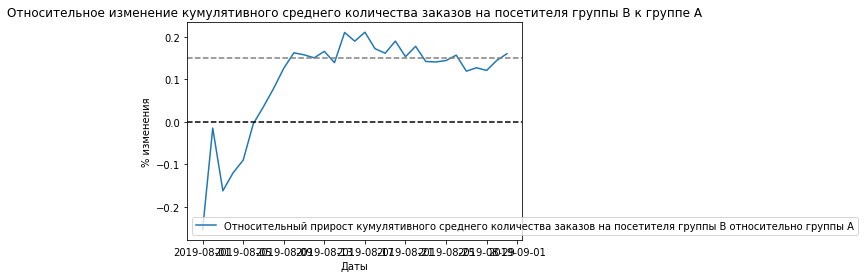

In [22]:
plt.plot(data['date'], data['conversionCummulativeB']/data['conversionCummulativeA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.15, color='grey', linestyle='--')
plt.xlabel("Даты")
plt.ylabel("% изменения")
plt.title("Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")

<i>Почти с самого начала теста группа В лидирует по метрике, зафиксирировалась около прироста в 20%, затем упало и зафиксировалось около 15%.<i>

**Построим точечные графики и найдем перцентили:**

**1) Точечный график количества заказов по пользователям:**

Text(0.5, 1.0, 'Количество заказов по пользователям:')

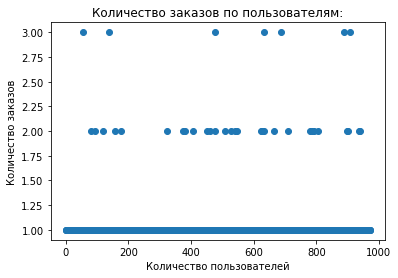

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))
    
ordersByUsers.columns = ['visitorId', 'orders']


x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")
plt.title("Количество заказов по пользователям:")

<i>Пользователей заказавших более двух раз мало, они в полне могут быть аномальными. Чтобы оценить 2 -3 заказа этого много или мало далее посчитаем выборочные перцентили.<i>

**95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей:**


In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


<i>Не более 5% пользователей совершали больше 1 заказов, и не более 1% - больше 2 заказов.<i>

**2) Построим точечный график стоимостей заказов:**

Text(0.5, 1.0, 'Количество стоимости заказов по пользователям:')

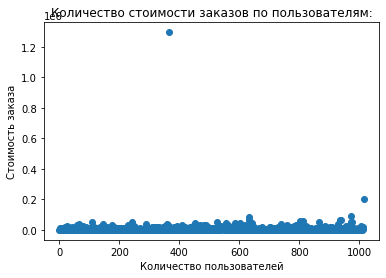

In [25]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel("Количество пользователей")
plt.ylabel("Стоимость заказа")
plt.title("Количество стоимости заказов по пользователям:")

<i>Заказов стоимостью 1 200 000 рублей не очень много, также есть выбросы около 200 000 рублей.<i>

**95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов:**

In [26]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


<i>Не более, чем  5% заказов дороже 26 785 рублей, и не больше, чем у 1% - дороже 53 904 рублей.<i>

**Сформулируем нулевую гипотезу:** <br>
"Н0 - Различий в  среднем количестве заказов на посетителя между группами нет."<br>
**Сформулируем альтернативную гипотезу:** <br>
"Н1 - Есть различия в  среднем количестве заказов на посетителя между группами."

**Далее найдем статистические различия по сырым и очищенным данным:**

**1) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:**

In [27]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print('Относительное различие в среднем между группами: ', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-value: 0.011
Относительное различие в среднем между группами:  0.160


<i>P-value значительно меньше 5%, поэтому нулевую гипотезу отвергаем. Анализ "сырых данных", сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В  конкверсии группы А равен 13,8%.<i>

<i><i>

**2) Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:**

**Сформулируем нулевую гипотезу:** <br>
"Н0 - Различий в  среднем чеке заказа между группами нет."<br>
**Сформулируем альтернативную гипотезу:** <br>
"Н1 - Есть различия в  среднем чеке между группами."

In [28]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем между группами: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value: 0.829
Относительное различие в среднем между группами:  0.287


<i>P-value больше 0,05 -  статистически значимых отличий в среднем чеке между группами нет, нулевую гипотезу отвергаем. Наблюдаемое различие в 26% не является статисически значимым.<i>

<i><i>

**3) Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:**

In [29]:
ordersByUsersA

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [30]:
#Ограничимся количеством покупок у одного пользователя не более двух и сумма заказа не более 30 000, 
#Так мы уберёv 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,)
revenue_lim = np.percentile(orders['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64


<div class="alert alert-warning">
    
  <b>Комментарий ревьюера</b>
    
  ⚠️ Тут можно или непосредственно вычисления по 95 / 99 перцентилю, например:
```python 
revenue_lim = np.percentile(orders['revenue'], 95)`
```
или задавать в качестве отдельной переменой:

```python 
revenue_lim = 100000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']`
```

</div>

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.012
Относительное различие в среднем между группами:  0.182


<i>Как и в случае с "сырыми данными" - статистическая значимость достигнута, нулевую гипотезу отвергаем.<i>

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Принимаем или отвергаем нулевую гипотезу?

</div>    
<div class="alert alert-success">
  
  <b>Комментарий ревьюера v.2</b>
    
  ✔️ И тут отвергаем нулевую гипотезу.
</div>

<i><i>

<i><i>

**4) Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:**

In [32]:
print('p-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие в среднем между группами: ', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.646
Относительное различие в среднем между группами:  -0.048


<i><i>

<i>После подчищения данных статистическая значимость не появилась, почти осталась на том же уровне. Значит нулевую гипотезу нет причин отвергать. А вот после удаления выбросов в данных стало меньше шума  и средний чем сегмента В оказался меньше, чем у группы А, что очень разнится с "сырыми данными".<i>

<div class="alert alert-danger">
    
  <b>Комментарий ревьюера</b>
    
  ❌ Согласен, только обрати, пожалуйста, внимание на выводы: в начале мы можем говорить о наблюдаемых различиях, а потом сказать - являются ли они стат. значимыми или нет.

</div>
<div class="alert alert-warning">
    
  <b>Комментарий ревьюера v.2</b>
    
  ⚠️ Тут стоит так-же написать, что разница между группами 4,8% не является стат.значимой
</div>

## Выводы

Результаты решённых в этом проекте задач в сборе: <br>
 - Статистическая значимость по заказам достигнута и в сырых  и в очищенных данных, конверсия отличается не более чем на 17%  сегмент В значительно лучше А.<br>
 - По сырым и очищенным  данным статистическая значимость по среднему чеку не появилась, почти осталась на том же уровне, после удаления выбросов в данных стало меньше шума и средний чем сегмента В оказался меньше, чем у группы А, что очень разнится с "сырыми данными".<br>
 - График различия конверсии между группами сообщает, что результаты группы B бывали лучше группы A: но имеют тенденцию к падению, нет фиксации около одного среднего значения.
 - График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.<br><br>
**Исходя из фактов выше, хоть и не все показатели показали себя с лучшей стороны, следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы.** 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️  Тест окрасился только на половину - по количеству заказов. Но это тоже хорошо, т.к. стат.значимой разницы по среднему чеку нет (чек не увеличился, но и не уменьшился) то при возросшем количестве заказов с сохранившимся средним чеком выручка будет так-же расти. И значит мы заканчиваем анализ A/B-теста - он оказался успешным! 

</div>

<div style="border:solid black 2px; padding: 20px">
  
    
  <b>Чек-лист доработок</b>
    
 
  📃 Проверить данные на  дубликаты.    

  📃 Пересчитать RICE и ICE.
    
  📃 Проверить корректность разбиения пользователей на группы.
    
  📃 Дооформить графики.
    
  📃 Пересмотреть выбросы по количеству и стоимости заказов.
    
  📃 Сформулировать нулевую и альтернативную гипотезы.
    
  📃 Проверить выводы стат.тестов.
    
 
Жду твой проект на повторное ревью. Не стесняйся оставлять комментарии и задавать вопросы. Удачи! Все получится.
</div>